In [20]:
%pylab inline
import mdtraj as md
import pandas as pd
rc('font', family='serif', size=15)

Populating the interactive namespace from numpy and matplotlib


In [2]:
top_r2 = md.load('/home/gerry/heat/structures/r2-unbound.pdb')
top_r2_bb = top_r2.topology.select('backbone')
top_h = md.load('/home/gerry/heat/structures/H-unbound.pdb')
top_h_bb = top_h.topology.select('backbone')

In [3]:
traj_h = []
for i in range(0,8):
    traj = md.load('./1222/H_unbound/pro_xtc/300k'+str(i)+'_pro_30.xtc', top=top_h)
    traj.superpose(top_h)
    traj_h.append(traj)

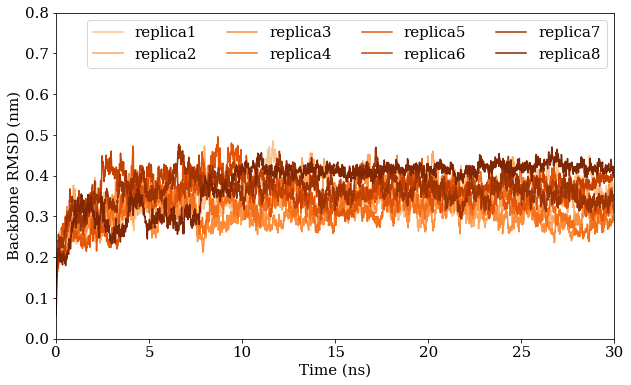

In [21]:
figure(figsize=(10,6))
colors = iter(cm.Oranges(np.linspace(0.3, 1, len(traj_h))))
for i,t in enumerate(traj_h):
    rmsd = md.rmsd(t, top_h, atom_indices=top_h_bb)
    plot(rmsd, color=next(colors), label='replica'+str(i+1))
    
legend(ncol=4)
xlim(0,3000)
xticks(range(0,3100,500),range(0,31,5))
xlabel('Time (ns)')
ylim(0,.8)
ylabel('Backbone RMSD (nm)')

savefig('fig_src/rmsd_h.png',format='png',dpi=600)

In [5]:
traj_r2 = []
for i in range(0,8):
    traj = md.load('./1222/R2_unbound/pro_xtc/300k'+str(i)+'_pro_30.xtc', top=top_r2)
    traj.superpose(top_r2)
    traj_r2.append(traj)

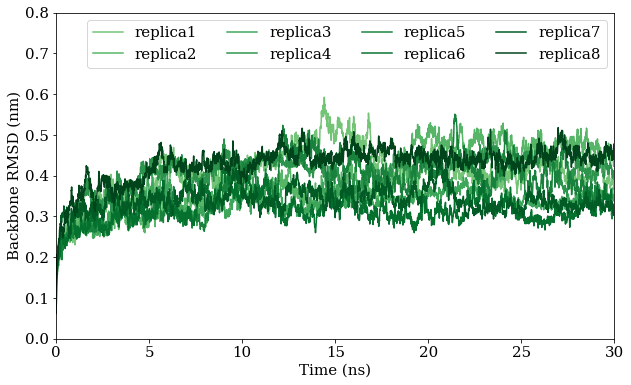

In [22]:
figure(figsize=(10,6))
colors = iter(cm.Greens(np.linspace(0.5, 1, len(traj_r2))))
for i,t in enumerate(traj_r2):
    rmsd = md.rmsd(t, top_r2, atom_indices=top_r2_bb)
    plot(rmsd, color=next(colors), label='replica'+str(i+1))

legend(ncol=4)
xlim(0,3000)
xticks(range(0,3100,500),range(0,31,5))
xlabel('Time (ns)')
ylim(0,.8)
ylabel('Backbone RMSD (nm)')

savefig('fig_src/rmsd_r2.png',format='png',dpi=600)